Prompt Engineering:

1. Give a persona
2. Split complex tasks into small tasks
3. Give it in steps and make sure to keep further steps or describe the context.
4. Give models time to think:
    Example: First work out your own solution to the problem. Then compare your solution
    

In [1]:
import base64
import pandas as pd

df = pd.read_excel("ChartswithCaptions.xlsx")

def encode_image(image_path):

    caption = df[df["imageid"]==int(image_path.split("/")[1].split(".")[0])]["full_caption"].values[0]

    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8"), caption
    

# image_2130, caption_2130 = encode_image("Charts/2130.png")
# image_2107, caption_2107 = encode_image("Charts/2107.png")
image_2065, caption_2065 = encode_image("Charts/26.png")

In [2]:
caption_2065

'Figure 8.19: Average GDP and CO2 reductions in 550ppmv stabilization scenarios: year 2050 (labels identify different scenario\ngroups).'

# Chart Analysis GPT

In [3]:
system_prompt = """
You are GPT-4o-mini, a reasoning model specialized in analyzing charts and their captions. Your task is to carefully examine the provided chart and caption, then clearly identify and list the attributes used in the chart.

When presented with a chart and its caption:
    1. Carefully inspect the chart provided.
    2. **Let's think step-by-step.** First, carefully inspect the provided chart and caption. Identify and list all attributes used in the chart. 
    3. **Briefly explain** how each attribute is represented or visualized in the chart (e.g., axis labels, legends, colors, data points).
    4. **Clearly separate** your response into two sections:
        a. "**Identified Attributes:**" (list attributes succinctly)
        b. "**Visualization Explanation:**" (briefly describe how each attribute is visualized)
    5. **Clearly summarize** the specific chart variables used (e.g., x-axis, y-axis, legend, color encoding) separately at the end of your response.

Important instructions for optimal performance:

1. Be concise and direct in your analysis.
2. Do not include unnecessary examples or additional context beyond what is provided.
3. Do not generate or assume any information not explicitly present in the provided chart and caption.
4. Leverage your internal chain-of-thought reasoning capability without explicit prompting for step-by-step reasoning.
5. Ensure your output is accurate, consistent, and directly based on the provided data only.
"""

In [4]:
from openai import OpenAI
import os

client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the caption for the image: {caption_2065}"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_2065}"
                    }
                }
            ],
        }
    ]
)
chart_2065 = response.choices[0].message.content

In [5]:
print(chart_2065)

### Identified Attributes:
1. **X-axis**: % of baseline CO2
2. **Y-axis**: % of baseline GDP
3. **Data Points**: Labels for different scenario groups (A1T, B1, A2, A1, B2, A1F1)
4. **Color**: All data points are represented in a dark purple color.

### Visualization Explanation:
1. **X-axis**: Represents the percentage of baseline CO2, ranging from 0 to 60%, providing a scale for CO2 reductions.
2. **Y-axis**: Represents the percentage of baseline GDP, ranging from 0 to 2%, indicating the impact on GDP.
3. **Data Points**: Each point is labeled with a scenario identifier (A1T, B1, etc.), showing the relationship between GDP and CO2 reductions for various scenarios.
4. **Color**: Data points are uniformly presented in dark purple, which distinctively marks them against the light background.

### Summary of Specific Chart Variables:
- **X-axis**: % of baseline CO2
- **Y-axis**: % of baseline GDP
- **Legend**: Scenario identifiers (A1T, B1, A2, A1, B2, A1F1)
- **Color Encoding**: Dark pur

In [6]:
image_2064, caption_2064 = encode_image("Charts/418.png")
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the caption for the image: {caption_2064}"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_2064}"
                    }
                }
            ],
        }
    ]
)
chart_2064 = response.choices[0].message.content

In [7]:
print(chart_2064)

**Identified Attributes:**

1. **Y-Axis:** Percentage reduction relative to baseline
2. **X-Axis:** Eventual CO2 stabilization level (ppm)
3. **Bars (Categories):** Different scenarios (A1B, A1T, A1FI, A2, B1, B2)
4. **Bar Colors:** Distinct colors representing each scenario
5. **Grid Lines:** Indicators for percentage values
6. **Caption/Title:** Describes the chart's focus (global average GDP reduction in 2050)

**Visualization Explanation:**

1. **Y-Axis:** Displays the percentage reduction in GDP, ranging from 0 to 4.5%, with appropriate increments marked.
2. **X-Axis:** Categorizes different CO2 stabilization levels (450, 550, 650, 750 ppm) along the horizontal dimension.
3. **Bars (Categories):** Each bar represents a scenario's projected GDP reduction for corresponding stabilization levels.
4. **Bar Colors:** Different colors are used for each scenario, providing a clear visual distinction between various potential outcomes.
5. **Grid Lines:** Help facilitate the reading of perc

# Bridging GPT

In [8]:
bridging_gpt_system_prompt = """
You are a Bridging GPT responsible for generating meaningful questions based on synthesized attributes from two charts.

Given the attributes of Chart A and Chart B, 
Both the charts contain "Identified Attributes", "Visualization Explanation", and "Summary of Chart Variables"

1. Analyze the relationships between the attributes of Chart A and Chart B.
2. Generate insightful questions and also answers for them that explore:
   - Comparisons between the two charts.
   - Trends, patterns, or correlations suggested by their attributes.
   - Real-world implications or hypotheses based on their common attributes (if applicable).

Structure your response as follows:

## Generated Questions and Answers:
- [List meaningful questions here]
- [List corresponding answers here]

Be creative, logical, and ensure that your questions are relevant to the provided attributes and their relationships.
"""

In [9]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": bridging_gpt_system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the synthesis of chart A: {chart_2064} and chart B: {chart_2065}"}
            ],
        }
    ]
)
print(response.choices[0].message.content)

## Generated Questions and Answers:

1. **Question:** How do the CO2 stabilization levels represented in Chart A (450, 550, 650, 750 ppm) compare in terms of GDP reduction with the percentage of baseline CO2 in Chart B?
   - **Answer:** Chart A directly correlates different stabilization levels with their respective GDP reductions, while Chart B illustrates the impact of various percentage reductions from the baseline CO2 on GDP. As the stabilization levels in Chart A increase (e.g., from 450 to 750 ppm), it can be inferred that the GDP reduction percentage may also vary, indicating that higher stabilization levels might lead to different economic impacts. However, without cross-analyzing exact values, specific numerical comparisons cannot be made.

2. **Question:** What trends can be observed in GDP reductions as the CO2 stabilization level increases in Chart A, and how does this relate to the data points within Chart B?
   - **Answer:** As CO2 stabilization levels increase in Chart A

## Trail runs

# Keyword extractor GPT

In [10]:
keyword_extraction_system_prompt = """ 
You are a specialized Keyword Extraction GPT designed to distill chart analyses into semantic keywords.

Your task is to analyze the provided chart description (which includes "Identified Attributes", "Visualization Explanation", and "Summary of Chart Variables") and extract the most significant keywords that represent:

1. Core variables/attributes present in the chart
2. Key measurement units and scales
3. Central scientific or data concepts being visualized
4. Important methodologies or data types

Guidelines:
- Focus on domain-specific terminology rather than generic terms
- Include units of measurement when semantically relevant
- Extract only terms explicitly present or strongly implied in the analysis
- Limit to 8-12 keywords for clarity

Structure your response exactly as follows:

## Extracted Keywords:
- [Keyword 1]
- [Keyword 2]
...

Do not include any explanations or additional commentary.
"""

In [11]:
keywords_generated_1 = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": keyword_extraction_system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the Chart Analysis output for chart: {chart_2065}"}
            ],
        }
    ]
)
print(keywords_generated_1.choices[0].message.content)

## Extracted Keywords:
- CO2 Emissions
- Years
- Gt CO2
- Electricity plants
- Industry
- Road transport
- Residential sectors
- Deforestation
- Color-coded
- Line graph
- Data series
- Timeline


In [11]:
keywords_generated_2 = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": keyword_extraction_system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the Chart Analysis output for chart: {chart_2064}"}
            ],
        }
    ]
)
print(keywords_generated_2.choices[0].message.content)

## Extracted Keywords:
- Time (Ma)
- Atmospheric CO2 (ppm)
- Deep Ocean Temperature (°C)
- Ice Sheet Representation
- CO2 Proxy Methods
- Geochemical Models
- Isotope Records
- Error Representation
- Ice Volume Representation



In [12]:
comparison_system_prompt = """
You are a Comparison Agent specialized in identifying relationships between different charts based on their attributes and extracted keywords.

Given two chart analyses with their extracted keywords:

Chart A Keywords:
[Keywords from Chart A]

Chart B Keywords:
[Keywords from Chart B]

Perform the following analysis:

1. Identify common attributes shared by both charts
2. Identify unique attributes specific to each chart
3. Describe potential meaningful relationships between these charts

Structure your response exactly as follows:

## Common Attributes:
- [List common attributes]

## Unique Attributes - Chart A:
- [List attributes unique to Chart A]

## Unique Attributes - Chart B:
- [List attributes unique to Chart B]

## Potential Relationships:
- [Describe potential relationships between charts]

Be concise, specific, and focus only on meaningful connections.
"""

In [13]:
comparison = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": comparison_system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the keyword for Chart A: {keywords_generated_1.choices[0].message.content}, and Chart B: {keywords_generated_2.choices[0].message.content}"},
            ],
        }
    ]
)
print(comparison.choices[0].message.content)

## Common Attributes:
- Time (as a factor in both charts)
- Various energy/temperature representations (though specific contexts differ)

## Unique Attributes - Chart A:
- Energy Technologies 
- Coal
- Gas
- Oil
- Nuclear
- Biomass
- Exajoules (EJ)
- Baseline Scenarios
- Intervention Scenarios
- Box Plot
- Percentiles

## Unique Attributes - Chart B:
- Atmospheric CO2 (ppm)
- Deep Ocean Temperature (°C)
- Ice Sheet Representation
- CO2 Proxy Methods
- Geochemical Models
- Isotope Records
- Error Representation
- Ice Volume Representation

## Potential Relationships:
- Both charts analyze long-term changes over time, though Chart A focuses on energy technologies and their scenarios, while Chart B examines climatic and geological time scales. The energy outputs from Chart A may indirectly relate to CO2 levels in Chart B, suggesting a connection between energy consumption patterns and their impact on atmospheric conditions. Additionally, the temperature data and ice representations in Cha

In [18]:
insight_generator = """
You are an expert Data Analysis GPT specialized in generating comprehensive analytical insights from multiple data visualizations.

Given two chart analyses (including their identified attributes, visualization explanations, and variables), your task is to:

1. Generate thoughtful questions that can ONLY be answered by analyzing both charts together
2. Provide detailed answers to each question based on the chart analyses
3. Explain why each question matters from an analytical perspective

Your questions should:
- Require synthesizing information across both visualizations
- Reveal meaningful relationships, contrasts, or complementary information
- Consider temporal, spatial, or conceptual connections between the visualizations
- Lead to deeper insights about patterns, relationships, or contradictions

Structure your response exactly as follows:

## Analytical Questions and Answers:

### Question 1:
[Question that requires analyzing both charts together]

#### Answer:
[Detailed answer based on analysis of both charts]

#### Why This Question Matters:
[Explanation of the analytical significance and what insights this reveals]

### Question 2:
[Question that requires analyzing both charts together]

#### Answer:
[Detailed answer based on analysis of both charts]

#### Why This Question Matters:
[Explanation of the analytical significance and what insights this reveals]

[Continue with additional questions as appropriate]

Ensure each question is specific, data-focused, and genuinely requires examining both charts to answer effectively. Your answers should demonstrate cross-chart analysis and synthesis of information.

"""

In [19]:
bridging_gpt = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": insight_generator},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": f"Here is the synthesis/ Chart Analysis of chart A: {chart_2064} and chart B: {chart_2065}. And here is the comparison of keywords between chart A and chart B: {comparison.choices[0].message.content}"},
            ],
        }
    ]
)
print(bridging_gpt.choices[0].message.content)

## Analytical Questions and Answers:

### Question 1:
How do the predicted changes in energy technology outputs by 2100 in Chart B relate to historical CO2 levels and deep ocean temperatures in Chart A, particularly in terms of potential climate implications?

#### Answer:
Chart A shows that past atmospheric CO2 levels and deep ocean temperatures have fluctuated significantly over geological time, which were influenced by energy dynamics (like fossil fuel burning) and ice sheet levels. In contrast, Chart B models future energy outputs for various technologies (coal, gas, oil, nuclear, and biomass), projecting significant energy consumption scenarios for 2100. The connection here is twofold: if future energy outputs, particularly from fossil fuels (coal, gas, and oil), increase as projected, they are likely to push atmospheric CO2 levels higher, potentially mimicking historical changes seen in Chart A. If this increase mirrors the past spikes in CO2, similar warming trends could be expe

## Generating Vis and caption for the summarized both captions and visualizations

In [ ]:
class CombinedChartVisualizationWorkflow:
    def __init__(self, model="gpt-4o-mini", dalle_model="dall-e-2"):
        self.model = model
        self.dalle_model = dalle_model
        self.combined_summary_prompt = """
            You are a Chart Synthesis Agent specialized in creating unified summaries from multiple chart analyses. Your task is to combine analyses of two separate charts into a single coherent description that can be used to generate a new visualization.

            Given the analyses of two different charts:

            1. Extract the most important elements, relationships, and patterns from both charts
            2. Identify how these elements could be meaningfully combined in a single visualization
            3. Create a detailed description suitable for image generation

            Structure your response as follows:

            ## Combined Chart Description:
            [Provide a detailed description of how the combined visualization should appear]

            ## Key Elements to Visualize:
            - [List key data elements and relationships to include]

            ## Visual Structure:
            [Describe the recommended chart type, layout, and organization]

            ## Color and Style Guidance:
            [Provide guidance on color schemes and visual emphasis]

            Your description should be specific, detailed, and optimized for visualization generation.
        """
        self.client = OpenAI()
        
    def create_combined_summary(self, analysis_a, analysis_b):

        prompt = f"""
        Chart A Analysis:
        {analysis_a}

        Chart B Analysis:
        {analysis_b}

        Create a combined summary that captures the key elements of both charts in a way 
        that could be used to generate a new visualization.
        """
        
        response = self.client.chat.completions.create(
            model=self.model,
            messages=[
                {"role": "system", "content": self.combined_summary_prompt},
                {"role": "user", "content": prompt}
            ]
        )
        return response.choices[0].message.content
    
    def generate_visualization(self, combined_summary):
        dalle_prompt = f"""Create a professional data visualization that combines elements 
        from two charts according to this description:

        {combined_summary}

        The visualization should be clean, professional, and follow data visualization 
        best practices with appropriate labels, clear organization, and a professional 
        color scheme. Create a single, cohesive chart that effectively combines 
        elements from the original charts."""
        
        response = self.client.images.generate(
            model=self.dalle_model,
            prompt=dalle_prompt,
            size="512x512",
            quality="standard",
            n=1
        )
        
        return response.data[0].url

In [ ]:
# visualization_gen = CombinedChartVisualizationWorkflow()
# combined_summary = visualization_gen.create_combined_summary(chart_2064, chart_2065)
# # visualization_url = visualization_gen.generate_visualization(combined_summary)
# # print(f"Combined Chart URL: {visualization_url}")

In [ ]:
# from IPython.display import Image
# print("Printing the summary of both charts in a single chart")
# Image(filename='generated_image(chart-2064,2065).png') 

In [ ]:
# from IPython.display import Image
# print("Printing the summary of both charts in a single chart (HD)")
# Image(filename='generated_image_hd(chart-2064,2065).png') 

### Vector Space
- Similarity

### Method - 1

In [3]:
from sentence_transformers import SentenceTransformer
import numpy as np

/home/saikiranbattula/Documents/Multi-ChartQA/.multi_chart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def calculate_utility_with_embeddings(attrs1, attrs2, agl, model_name=None, weights=None, cutoff_length=None):

    attrs1_set = set(attrs1)
    attrs2_set = set(attrs2)
    
    sa = attrs1_set.intersection(attrs2_set)
    
    sa_ratio = len(sa) / len(attrs1_set.union(attrs2_set))
    
    agl_set = set(agl)
    agl_ratio = len(agl_set.intersection(sa)) / len(agl_set) if len(agl_set) > 0 else 0
    
    if model_name is None:
        model = SentenceTransformer('all-MiniLM-L6-v2')
    else:
        model = SentenceTransformer(model_name)
    
    embeddings1 = model.encode(list(attrs1_set))
    embeddings2 = model.encode(list(attrs2_set))
    
    similarity_matrix = np.zeros((len(embeddings1), len(embeddings2)))
    for i in range(len(embeddings1)):
        for j in range(len(embeddings2)):
            similarity_matrix[i, j] = np.dot(embeddings1[i], embeddings2[j]) / (
                np.linalg.norm(embeddings1[i]) * np.linalg.norm(embeddings2[j])
            )
    
    if len(embeddings1) > 0 and len(embeddings2) > 0:
        sim_ratio_1to2 = np.mean(np.max(similarity_matrix, axis=1))
        sim_ratio_2to1 = np.mean(np.max(similarity_matrix, axis=0))
        sim_ratio = (sim_ratio_1to2 + sim_ratio_2to1) / 2
    else:
        sim_ratio = 0
    
    if weights is None:
        weights = [20, 20, 60]
    
    utility_score = (weights[0] * sa_ratio) + (weights[1] * agl_ratio) + (weights[2] * sim_ratio)
    
    return utility_score, {
        'shared_attributes': sa,
        'sa_ratio': sa_ratio,
        'agl_ratio': agl_ratio,
        'sim_ratio': sim_ratio,
        'similarity_matrix': similarity_matrix
    }


In [ ]:
ChartA_attributes = ["Time Periods","Energy Technologies","Coal","Gas","Oil","Nuclear","Biomass","Exajoules (EJ)","Baseline Scenarios","Intervention Scenarios","Box Plot","Percentiles"]
ChartB_attributes = ["Time (Ma)","Atmospheric CO2 (ppm)","Deep Ocean Temperature (°C)","Ice Sheet Representation","CO2 Proxy Methods","Geochemical Models","Isotope Records","Error Representation","Ice Volume Representation"]

# utility_score, details = calculate_utility_with_embeddings(ChartA_attributes,ChartB_attributes,agl=["time","energy"])

In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline
words = ChartA_attributes + ChartB_attributes 
import networkx as nx
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(words)

similarity_matrix = np.zeros((len(words), len(words)))
for i in range(len(words)):
    for j in range(len(words)):
        similarity_matrix[i][j] = np.dot(embeddings[i], embeddings[j]) / (
            np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
        )

threshold = 0.3
G = nx.Graph()
for i in range(len(words)):
    for j in range(i+1, len(words)):
        if similarity_matrix[i][j] > threshold:
            G.add_edge(words[i], words[j], weight=similarity_matrix[i][j])


/home/saikiranbattula/Documents/Multi-ChartQA/.multi_chart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_33244/1617715805.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


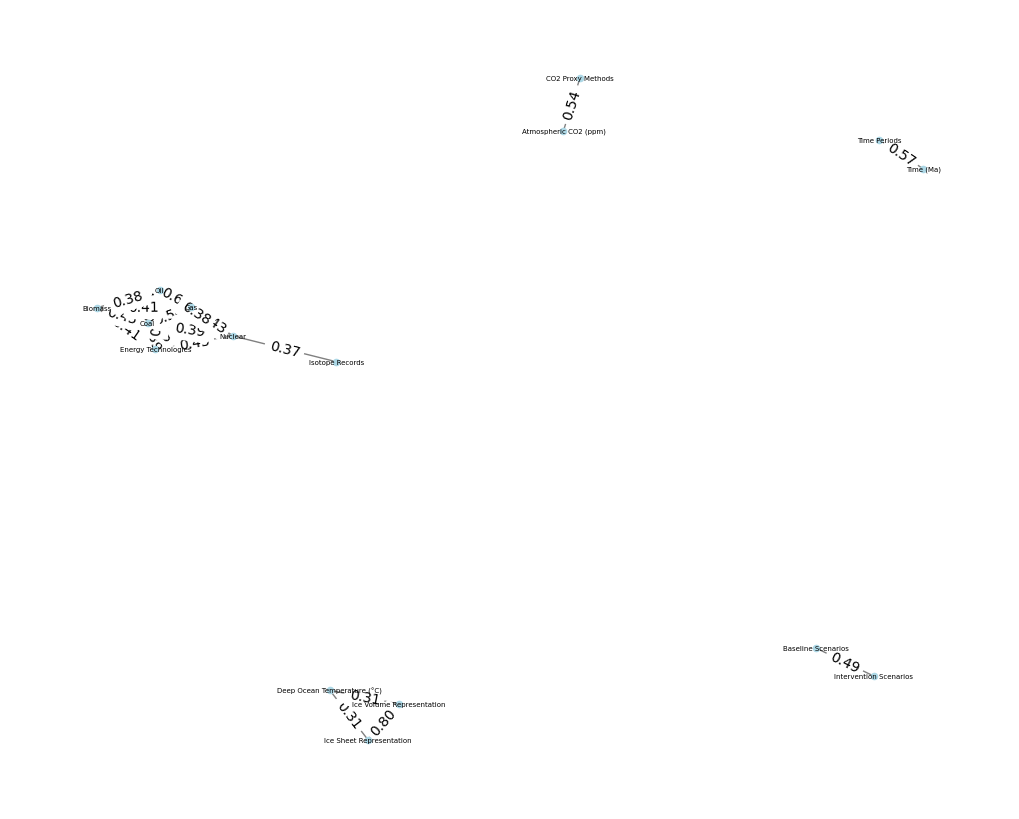

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        edge_color='gray', node_size=20, font_size=5)
nx.draw_networkx_edge_labels(G, pos, 
                            edge_labels={(u, v): f'{d["weight"]:.2f}' 
                                         for u, v, d in G.edges(data=True)})
plt.tight_layout()
plt.show()

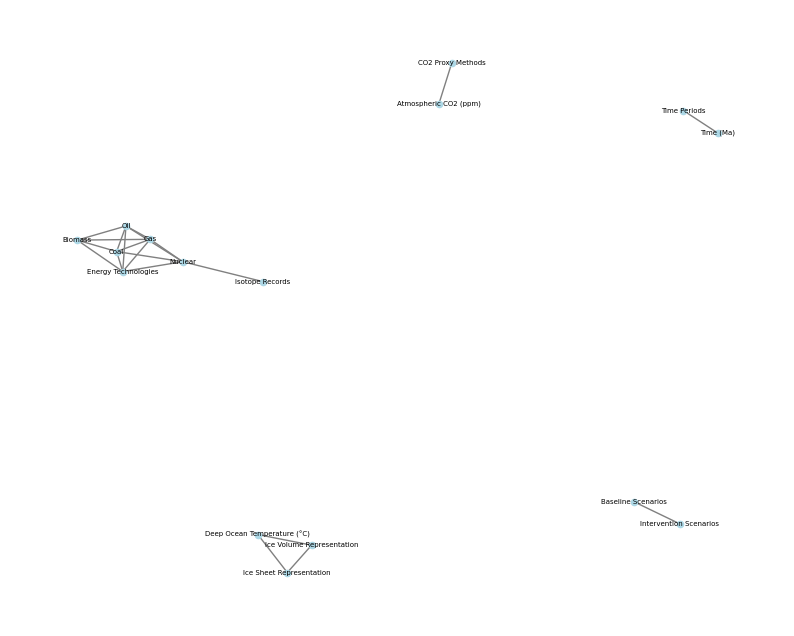

In [ ]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

# Create the initial static plot
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        edge_color='gray', node_size=20, font_size=5, ax=ax)

# Create a function to update the plot
def update_zoom(zoom):
    ax.clear()
    # Scale the node sizes and font sizes
    node_size = 20 * zoom
    font_size = 5 * zoom
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            edge_color='gray', node_size=node_size, font_size=font_size, ax=ax)
    fig.canvas.draw_idle()

# Create a slider widget
zoom_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=2.0,
    step=0.1,
    description='Zoom:',
    continuous_update=False
)

# Connect the slider to the update function
widgets.interactive(update_zoom, zoom=zoom_slider)
plt.show()

In [ ]:
import plotly.graph_objects as go
import networkx as nx
import numpy as np

def plot_interactive_network(G):
    pos = nx.spring_layout(G, seed=42)
    
    # Create edge traces
    edge_traces = []
    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        weight = edge[2].get('weight', 0)
        
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None],
            line=dict(width=1, color='gray'),
            hoverinfo='text',
            text=f'Weight: {weight:.2f}',
            mode='lines')
        edge_traces.append(edge_trace)
    
    # Create node trace
    node_trace = go.Scatter(
        x=[pos[node][0] for node in G.nodes()],
        y=[pos[node][1] for node in G.nodes()],
        mode='markers+text',
        text=list(G.nodes()),
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Blues',
            color=[len(list(G.neighbors(node))) for node in G.nodes()],
            size=15,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                
            )
        )
    )
    
    # Create the figure
    fig = go.Figure(data=edge_traces + [node_trace],
                   layout=go.Layout(
                       title='Interactive Network Graph',
                       titlefont_size=16,
                       showlegend=False,
                       hovermode='closest',
                       margin=dict(b=20,l=5,r=5,t=40),
                       xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                       yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                   )
    
    return fig

# Create and display the interactive graph
fig = plot_interactive_network(G)
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'titlefont'

Did you mean "title"?

    Valid properties:
        activeselection
            :class:`plotly.graph_objects.layout.Activeselection`
            instance or dict with compatible properties
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        barcornerradius
            Sets the rounding of bar corners. May be an integer
            number of pixels, or a percentage of bar width (as a
            string ending in %).
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to reduce
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to reduce "opacity" to
            see multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        hoversubplots
            Determines expansion of hover effects to other subplots
            If "single" just the axis pair of the primary point is
            included without overlaying subplots. If "overlaying"
            all subplots using the main axis and occupying the same
            space are included. If "axis", also include stacked
            subplots using the same axis when `hovermode` is set to
            "x", *x unified*, "y" or *y unified*.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        map
            :class:`plotly.graph_objects.layout.Map` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        minreducedheight
            Minimum height of the plot with margin.automargin
            applied (in px)
        minreducedwidth
            Minimum width of the plot with margin.automargin
            applied (in px)
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newselection
            :class:`plotly.graph_objects.layout.Newselection`
            instance or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scattergap
            Sets the gap (in plot fraction) between scatter points
            of adjacent location coordinates. Defaults to `bargap`.
        scattermode
            Determines how scatter points at the same location
            coordinate are displayed on the graph. With "group",
            the scatter points are plotted next to one another
            centered around the shared location. With "overlay",
            the scatter points are plotted over one another, you
            might need to reduce "opacity" to see multiple scatter
            points.
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        selections
            A tuple of
            :class:`plotly.graph_objects.layout.Selection`
            instances or dicts with compatible properties
        selectiondefaults
            When used in a template (as
            layout.template.layout.selectiondefaults), sets the
            default property values to use for elements of
            layout.selections
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to reduce "opacity" to see
            multiple bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "title"?

Bad property path:
titlefont_size
^^^^^^^^^

In [8]:
details

{'shared_attributes': set(),
 'sa_ratio': 0.0,
 'agl_ratio': 0.0,
 'sim_ratio': np.float64(0.2593732896364398),
 'similarity_matrix': array([[ 0.02613065,  0.05927958,  0.15092869,  0.1934218 ,  0.10780906,
          0.13202676,  0.11535592,  0.07774786, -0.00656554],
        [ 0.06320973,  0.08740117,  0.15484482, -0.00352021,  0.37269282,
          0.10039064,  0.18418115,  0.08402253,  0.04077985],
        [ 0.18980312,  0.15037581,  0.04927186,  0.02290079, -0.01079234,
          0.07504315,  0.09190354,  0.2638616 ,  0.01170703],
        [ 0.03929371,  0.1414351 ,  0.0646834 ,  0.11067294, -0.00505657,
          0.06234156,  0.20868526,  0.09453705, -0.03387411],
        [ 0.13877037,  0.09190246,  0.10446048,  0.10370044,  0.06663609,
          0.27991411,  0.19723248,  0.12273016,  0.03503696],
        [ 0.03273351,  0.11073162,  0.17701663,  0.1243125 , -0.01406017,
          0.07169755,  0.161164  ,  0.09451094,  0.04748832],
        [ 0.07620633,  0.10880881,  0.12731716,  0.

### Abstractive summarization

In [1]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

/home/saikiranbattula/Documents/Multi-ChartQA/.multi_chart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [12]:
inputs = tokenizer("summarize: " + combined_summary, return_tensors="pt", max_length=512, truncation=True)

In [28]:
output = model.generate(inputs["input_ids"], max_length=400, min_length=30, length_penalty=1.0, num_beams=4, early_stopping=True)

In [29]:
output

tensor([[    0,     8,   420,  1375,    56,   992,    30,     8, 12674,    32,
         10804,   447,   331,  1918,  2847,   357,  6145,    11,  5431,  2912,
           640,  4040,    13,   203,     3,     5,     8,  2007,  1375,    56,
         25086,     8,   827,  5962, 13911,    45,   315,  2896,    16,  1881,
             9,  8921,   965,     3,     5,     1]])

In [34]:
from transformers import pipeline

summarizer = pipeline("summarization", model="t5-large")

Device set to use cuda:0


In [35]:
print(summarizer(combined_summary, max_length=400, min_length=30, do_sample=False))

[{'summary_text': 'the top section will focus on the paleoclimatic data regarding CO2 concentration and ocean temperature across millions of years . the bottom section will visualize the energy consumption scenarios from different technologies in exajoules . this dual-layered chart will facilitate a comprehensive understanding of historical climate trends in relation to the future energy landscape .'}]
